In [2]:
!mkdir jpg1
%cd /content/jpg1
!wget ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg1.tar.gz
!tar -xf jpg1.tar.gz

/content/jpg1
--2022-07-02 18:18:35--  ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg1.tar.gz
           => ‘jpg1.tar.gz’
Resolving ftp.inrialpes.fr (ftp.inrialpes.fr)... 194.199.18.221
Connecting to ftp.inrialpes.fr (ftp.inrialpes.fr)|194.199.18.221|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/lear/douze/data ... done.
==> SIZE jpg1.tar.gz ... 1141827194
==> PASV ... done.    ==> RETR jpg1.tar.gz ... done.
Length: 1141827194 (1.1G) (unauthoritative)

jpg1.tar.gz         100%[===================>]   1.06G  7.37MB/s    in 2m 18s  

2022-07-02 18:20:56 (7.86 MB/s) - ‘jpg1.tar.gz’ saved [1141827194]



In [3]:
%cd ..
!mkdir jpg2
%cd /content/jpg2
!wget ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg2.tar.gz
!tar -xf jpg2.tar.gz
%cd ..

/content
/content/jpg2
--2022-07-02 18:21:09--  ftp://ftp.inrialpes.fr/pub/lear/douze/data/jpg2.tar.gz
           => ‘jpg2.tar.gz’
Resolving ftp.inrialpes.fr (ftp.inrialpes.fr)... 194.199.18.221
Connecting to ftp.inrialpes.fr (ftp.inrialpes.fr)|194.199.18.221|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/lear/douze/data ... done.
==> SIZE jpg2.tar.gz ... 1701364177
==> PASV ... done.    ==> RETR jpg2.tar.gz ... done.
Length: 1701364177 (1.6G) (unauthoritative)

jpg2.tar.gz         100%[===================>]   1.58G  10.8MB/s    in 3m 33s  

2022-07-02 18:24:43 (7.64 MB/s) - ‘jpg2.tar.gz’ saved [1701364177]

/content


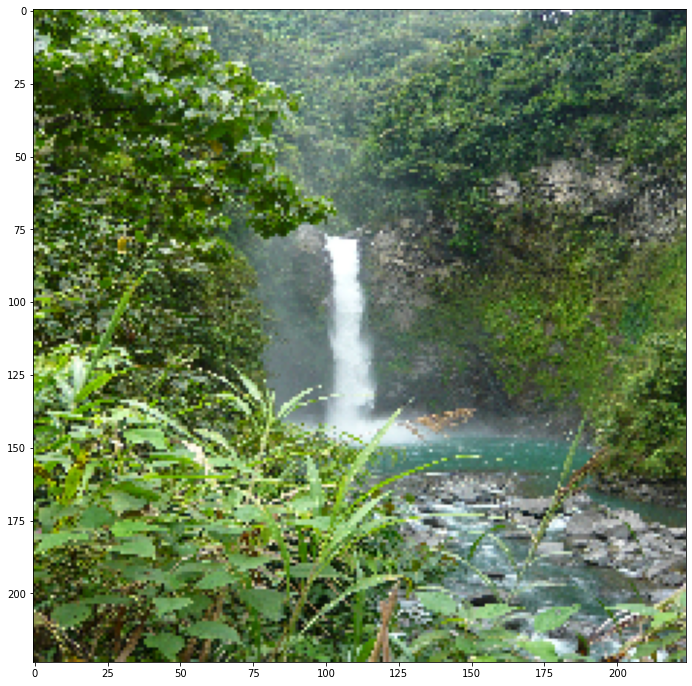

In [59]:
img_bgr = cv2.imread('jpg1/jpg/100200.jpg')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# resize image
img = cv2.resize(img, (224, 224))
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)

Text(0.5, 1.0, 'histogram of gray values')

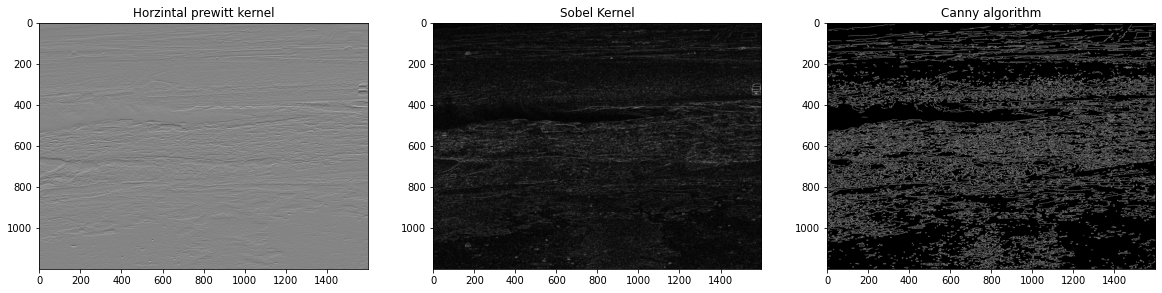

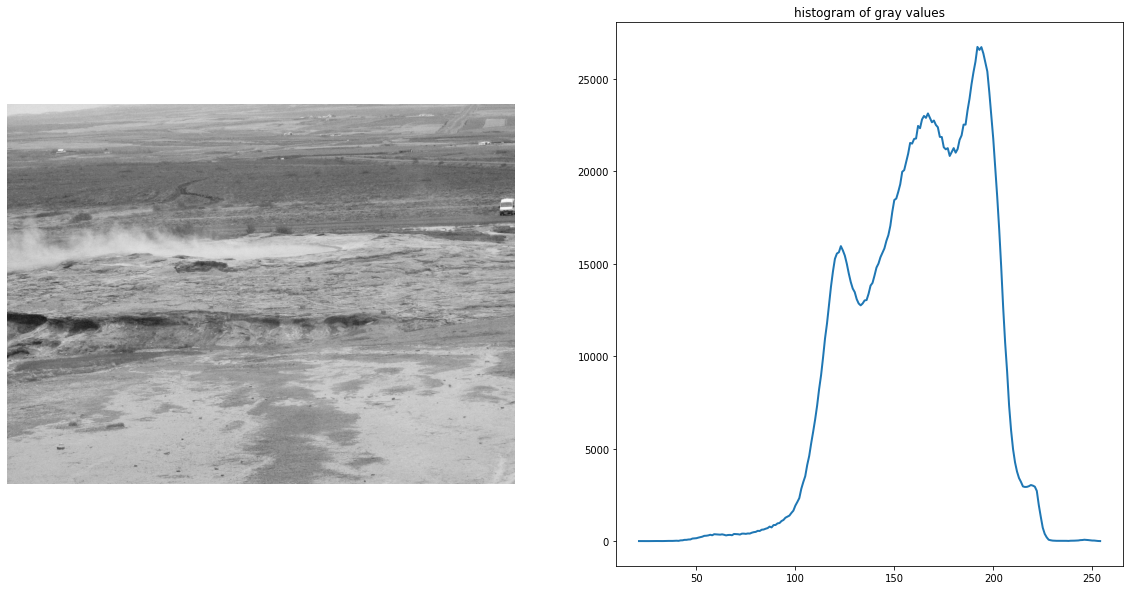

In [60]:
from skimage.filters import  prewitt_h,prewitt_v,sobel
from skimage import feature

from skimage.exposure import histogram

path = 'jpg2/jpg/'
name = '130001.jpg'
img = cv2.imread(path+name,0)



# prewitt kernel
pre_hor = prewitt_h(img)
pre_ver = prewitt_v(img)

# Sobel Kernel
ed_sobel = sobel(img)

# canny algorithm
can = feature.canny(img)

# Region-Based Segmentation
hist, hist_centers = histogram(img)


descs, descs_img = feature.daisy(img, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20, 14))
ax1.imshow(pre_hor, cmap='gray')
ax1.set_title('Horzintal prewitt kernel')
ax2.imshow(ed_sobel, cmap='gray');
ax2.set_title('Sobel Kernel')
ax3.imshow(can, cmap='gray');
ax3.set_title('Canny algorithm')


#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')


In [61]:
# Importamos librerías importantes
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

# CNN feature extractor

In [62]:
from keras.applications.vgg16 import VGG16
from tensorflow.compat.v2.keras.applications.resnet50 import ResNet50
from keras.models import Model

def cnn_extractor_VGG16(img):
    """
    Extractor de caracteristicas de una imagen con una red resnet pre-entrenada

    :param numpy.ndarray img: imagen

    :return: el vector caracteristicas
    """
    # preprocess img
    img = cv2.resize(img,(224,224))
    img = np.reshape(img,[1,224,224,3]) # return the image with shaping that TF wants.

    model = VGG16(include_top=False,input_shape=( 224, 224, 3))
    # remove the output layer
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # get extracted features
    features = model.predict(img)

    # 1x7x7x512 = 25088
    return features.flatten()

def cnn_extractor_ResNet50(img):
    """
    Extractor de caracteristicas de una imagen con una red resnet pre-entrenada

    :param numpy.ndarray img: imagen

    :return: el vector caracteristicas
    """
    # preprocess img
    img = cv2.resize(img,(224,224))
    img = np.reshape(img,[1,224,224,3]) # return the image with shaping that TF wants.

    model = ResNet50(include_top=False,input_shape=( 224, 224, 3))
    # remove the output layer
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # get extracted features
    features = model.predict(img)

    return features.flatten()

# Handcrafted metods

In [63]:

def classic_extractor_histogram(img):
    """
    Extractor de caracteristicas de una imagen con metodos handcrafted

    :param numpy.ndarray img: imagen
    
    :return: el vector caracteristicas
    """
    #The Histogram of Oriented Gradient (HOG) feature descriptor

    # ajustamos el tamaño de la imagen
    resized_img = resize(img, (128*4, 64*4))

    #creating hog features
    histogram, bin_edges = np.histogram(img, bins=256)

    return histogram
def classic_extractor_hog(img):
    """
    Extractor de caracteristicas de una imagen con metodos handcrafted

    :param numpy.ndarray img: imagen
    
    :return: el vector caracteristicas
    """
    #The Histogram of Oriented Gradient (HOG) feature descriptor

    # ajustamos el tamaño de la imagen
    resized_img = resize(img, (128*4, 64*4))

    #creating hog features
    feature, hog_img = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), visualize=True, multichannel=True)

    return feature



# **1) Cálculo de vector de características**
Utilizando esta función, calcule y guarde en memoria las características de cada imagen de la base de datos,
a modo de ahorrar tiempo en cada consulta (así se evita computar dichas características cada vez que se
realiza una consulta).





In [64]:
def extract_features(img,tipo_extractor):
    """
    Extractor de caracteristicas de una imagen con metodos handcrafted

    :param numpy.ndarray img: imagen
    :param str tipo_extractor: Tipo del extractor, puede ser clasico o CNN

    :return: el vector caracteristicas
    """
    if tipo_extractor == 'classic':
        features = classic_extractor_histogram(img)
    elif tipo_extractor == 'CNN':
        features = cnn_extractor_VGG16(img)
    else:
        print('seleccione el tipo de extractor')
    return features

In [65]:
dataFrame = pd.DataFrame(columns=['Name', 'Feature vector','Feature vector CNN'])

# Utilizando los algoritmos clasicos de extracción de caracteristicas.

In [66]:
# Creamos una lista que guardará las imágenes correspondientes a la primera secuencia 
path = glob.glob("jpg1//jpg//*.jpg") #ojo la lista de nombres no esta ordenada


for file in path:
    img = cv2.imread(file)

    feature = extract_features(img,tipo_extractor='classic')
    feature_cnn = extract_features(img,tipo_extractor='CNN')
    dataFrame = dataFrame.append({'Name': file[10:], 'Feature vector':feature,'Feature vector CNN':feature_cnn}, ignore_index=True)


    

In [67]:

# Creamos una lista que guardará las imágenes correspondientes a la primera secuencia 
path = glob.glob("jpg2//jpg//*.jpg") #ojo la lista de nombres no esta ordenada


for file in path:
    img = cv2.imread(file)

    feature = extract_features(img,tipo_extractor='classic')
    feature_cnn = extract_features(img,tipo_extractor='CNN')
    dataFrame = dataFrame.append({'Name': file[10:], 'Feature vector':feature,'Feature vector CNN':feature_cnn}, ignore_index=True)

    

In [68]:
dataFrame.head()

,Name,Feature vector,Feature vector CNN
0,102901.jpg,"[9712, 1431, 1688, 1942, 2283, 2681, 3347, 426...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,129901.jpg,"[1, 0, 2, 5, 8, 13, 17, 26, 43, 62, 63, 95, 14...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,100100.jpg,"[1635843, 130114, 141183, 158011, 172277, 1873...","[0.0, 0.0, 0.0, 0.0, 17.817324, 0.0, 0.0, 38.1..."
3,120501.jpg,"[29463, 6407, 9150, 15402, 18319, 29873, 29414...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9312987,..."
4,125703.jpg,"[1440290, 906113, 716357, 607799, 546971, 4986...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Se guardan los datos de las caracteristicas para luego utilizarlos.

In [74]:
import pickle
dataFrameHC = dataFrame[['Name','Feature vector']]

# create an iterator object with write permission - features_pkl
with open('featuresHC_pkl', 'wb') as file:
    pickle.dump(dataFrameHC, file)

In [75]:

dataFrameCNN = dataFrame[['Name','Feature vector CNN']]
# create an iterator object with write permission - features_pkl
with open('featuresCNN_pkl', 'wb') as file:
    pickle.dump(dataFrame, file)

In [70]:
# load saved model
#with open('features_pkl' , 'rb') as f:
#    features_pkl = pickle.load(f)

In [71]:
#features_pkl.head()